In [38]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Reading the image

In [39]:
img = cv2.imread("image1.jpg")

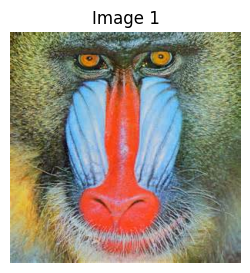

In [40]:
plt.figure(figsize=(3,3))
plt.imshow(img[:, :, ::-1])
plt.title("Image 1")
plt.axis("off")
plt.show()

## Coverting it to grayscale

In [41]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

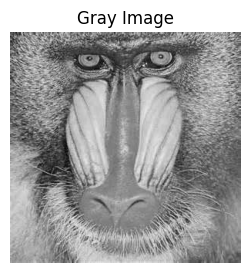

In [42]:
plt.figure(figsize=(3,3))
plt.imshow(img_gray, cmap="gray")
plt.title("Gray Image")
plt.axis("off")
plt.show()

## Normalizing the Image

In [43]:
norm_img = img_gray.astype(np.float64) / 255.0

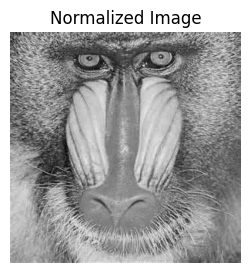

In [44]:

plt.figure(figsize=(3,3))
plt.imshow(norm_img, cmap="gray")
plt.title("Normalized Image")
plt.axis("off")
plt.show()

## Take a singular value decomposition of the image. 

In [45]:
U, S, Vt = np.linalg.svd(img_gray)

## Helper function for reconstruction

In [46]:
def reconstruct(k, u, s, vt):
    return np.dot(u[:,:k], np.dot(np.diag(s[:k]), vt[:k, :]))

## Reconstruct the image from with the largest singular value.

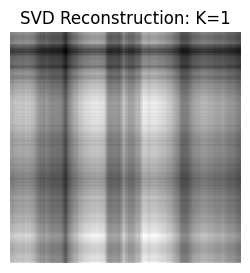

In [47]:
k1 = reconstruct(1, U, S, Vt)

plt.figure(figsize=(3, 3))
plt.title("SVD Reconstruction: K=1")

plt.imshow(k1, cmap="gray")
plt.axis("off")

plt.savefig("svd_reconstruction_top1_singular_value.png")

plt.show()


## Reconstruct the image from with the largest 10, 20, 50, 100 singular values.

In [48]:
k10 = reconstruct(10, U, S, Vt)
k20 = reconstruct(20, U, S, Vt)
k50 = reconstruct(50, U, S, Vt)
k100 = reconstruct(100, U, S, Vt)

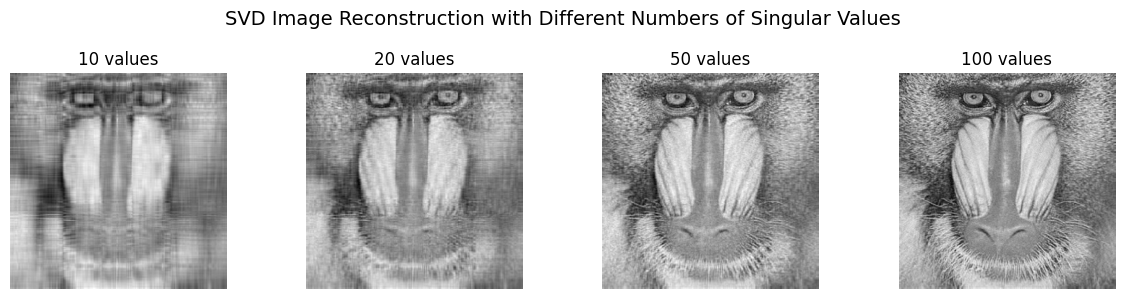

In [49]:
plt.figure(figsize=(12, 3))

plt.suptitle("SVD Image Reconstruction with Different Numbers of Singular Values", fontsize=14)

plt.subplot(1, 4, 1)
plt.imshow(k10, cmap="gray")
plt.title("10 values")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(k20, cmap="gray")
plt.title("20 values")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(k50, cmap="gray")
plt.title("50 values")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(k100, cmap="gray")
plt.title("100 values")
plt.axis("off")

plt.subplots_adjust(top=0.8)
plt.tight_layout()

plt.savefig("svd_reconstruction_comparison.png")

plt.show()
